Import Libraries

In [2]:
import sys
import os
sys.path.append(os.path.abspath(".."))
from src import preprocessing, baseline_model, models, evaluation_model, feature_imp, predict
import ipywidgets as widgets
from ipywidgets import interact
from src import scenario

Load and Split data

In [3]:
df = preprocessing.load_data()
X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled, scaler = preprocessing.split_and_scale(df)


Baseline Model

In [4]:
print("Baseline:", baseline_model.baseline_model(y_train, y_test))

Baseline: {'MAE': 4.9625, 'RMSE': np.float64(5.631496248777939), 'R2': -0.004757260886999015}


Evaluate multiple models

In [5]:
results, lr, ridge, svm = models.train_models(X_train_scaled, y_train, X_test_scaled, y_test)
print(results)

{'Linear Regression': {'MAE': 1.4607567168117601, 'RMSE': np.float64(1.781599661533451), 'R2': 0.8994380241009119}, 'Ridge Regression': {'MAE': 1.464301291647511, 'RMSE': np.float64(1.7872201577332216), 'R2': 0.8988025280800618}, 'SVM': {'MAE': 0.44797207504037484, 'RMSE': np.float64(0.5787839821760383), 'R2': 0.9893867947776526}}


Train and Evaluate usng SVM

{'Train': {'MAE': 0.2749441664959024, 'RMSE': np.float64(0.5633565810068559), 'R2': 0.9877634339056828}, 'Test': {'MAE': 0.44797207504037484, 'RMSE': np.float64(0.5787839821760383), 'R2': 0.9893867947776526}}


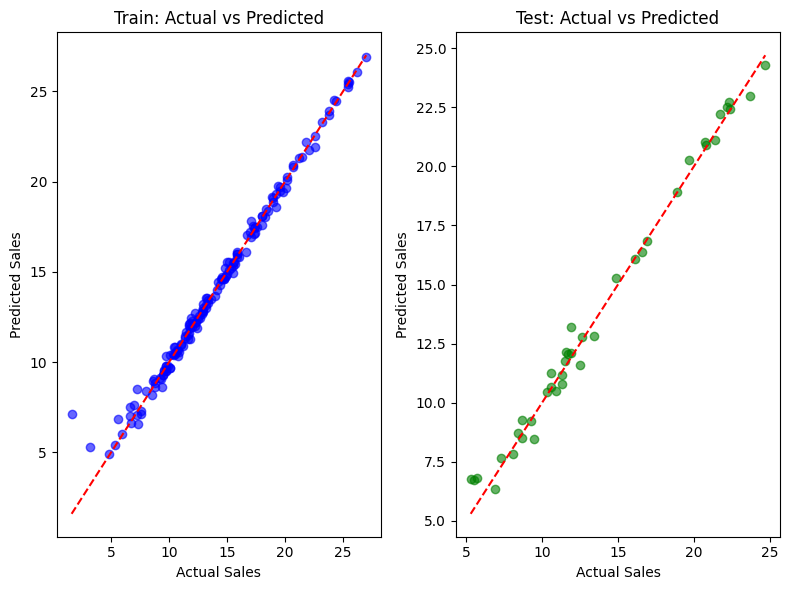

In [6]:
metrics, y_train_pred, y_test_pred = evaluation_model.evaluate_model(svm, X_train_scaled, y_train, X_test_scaled, y_test)
print(metrics)
evaluation_model.plot_predictions(y_train, y_train_pred, y_test, y_test_pred)

Find Feature Importance

     Feature  Importance
0         TV    1.314724
1      Radio    0.562544
2  Newspaper    0.006730


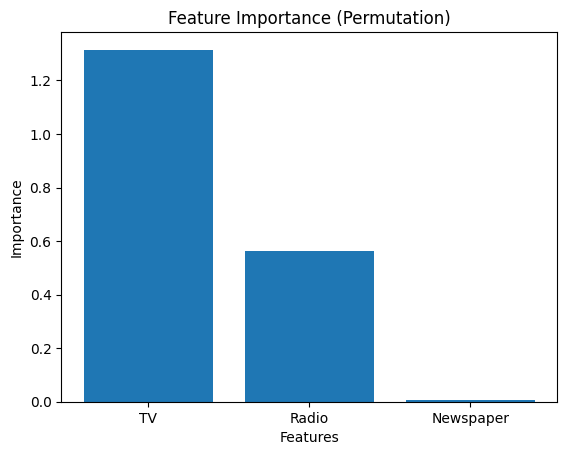

In [7]:
importance_df = feature_imp.get_feature_importance(svm, X_test_scaled, y_test, ["TV", "Radio", "Newspaper"])
print(importance_df)
feature_imp.plot_feature_importance(importance_df)

Predict by taking Input from user

In [8]:
# Create input boxes
tv_input = widgets.FloatText(value=100, description="TV ($k):")
radio_input = widgets.FloatText(value=20, description="Radio ($k):")
newspaper_input = widgets.FloatText(value=50, description="Newspaper ($k):")

# Button to trigger prediction
button = widgets.Button(description="Predict Sales", button_style="success")

# Output area
output = widgets.Output()

def on_button_clicked(b):
    with output:
        output.clear_output()
        pred = predict.predict_sales(tv_input.value, radio_input.value, newspaper_input.value, scaler, svm)
        print(f"📊 Predicted Sales: {pred:.2f}")

button.on_click(on_button_clicked)
display(tv_input, radio_input, newspaper_input, button, output)

FloatText(value=100.0, description='TV ($k):')

FloatText(value=20.0, description='Radio ($k):')

FloatText(value=50.0, description='Newspaper ($k):')

Button(button_style='success', description='Predict Sales', style=ButtonStyle())

Output()

Effect Of increasing or decreasing budget

In [9]:


results, impacts = scenario.run_scenarios(X_test, X_test_scaled, svm, scaler)

print("📊 Average Sales per Scenario:")
for k, v in results.items():
    print(f"{k}: {v:.3f}")

print("\n📈 Impact vs Baseline:")
for k, v in impacts.items():
    print(f"{k}: {v:.3f}")


📊 Average Sales per Scenario:
Baseline: 13.841
+10% TV: 14.377
-20% Newspaper: 13.818
+10% Radio: 14.286
+10% TV & +15% Radio: 15.065
-10% All Spends: 12.840

📈 Impact vs Baseline:
+10% TV: 0.536
-20% Newspaper: -0.023
+10% Radio: 0.445
+10% TV & +15% Radio: 1.224
-10% All Spends: -1.002
